## Time Series

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('exchange_rate.csv',parse_dates=True)
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [6]:
# this is an exchange rate data of 20 years (01-01-1990 to 10-10-2010)

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [14]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


<Axes: >

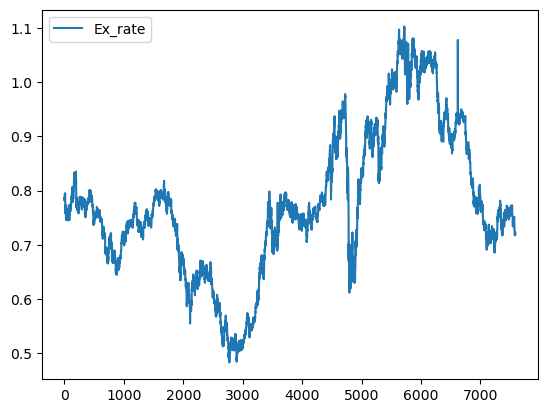

In [16]:
df.plot()

In [18]:
# Decompose with an additive model and multiplicative
from statsmodels.tsa.seasonal import seasonal_decompose
additive_result = seasonal_decompose(df['Ex_rate'], model='additive', period=60)
multiplicative_result = seasonal_decompose(df['Ex_rate'], model='multiplicative', period=60)

In [22]:
# Compute RSS for additive model
rss_additive = np.sum(additive_result.resid.dropna()**2)
rss_multiplicative = np.sum(multiplicative_result.resid.dropna()**2)

In [24]:
# Compare the RSS values
print(f"RSS for Additive Model: {rss_additive}")
print(f"RSS for Multiplicative Model: {rss_multiplicative}")

if rss_additive < rss_multiplicative:
    print("Additive model is a better fit based on RSS.")
else:
    print("Multiplicative model is a better fit based on RSS.")

RSS for Additive Model: 1.0162298012534043
RSS for Multiplicative Model: 7527.727921778696
Additive model is a better fit based on RSS.


In [26]:
result = seasonal_decompose(df['Ex_rate'], model='additive', period=60)

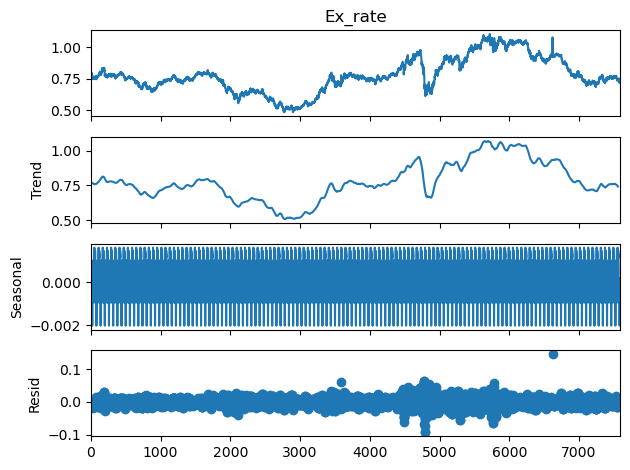

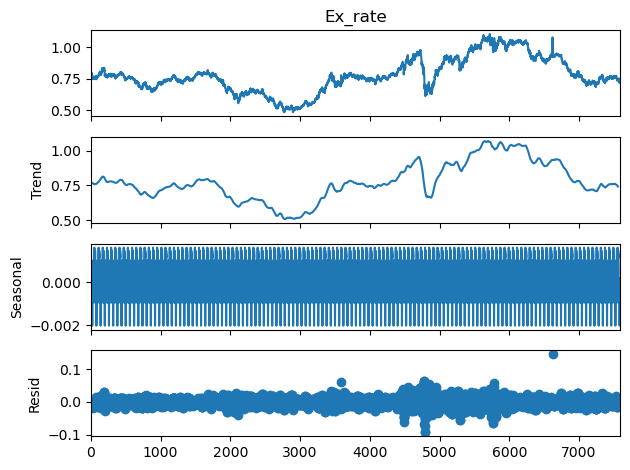

In [28]:
result.plot()

<Axes: >

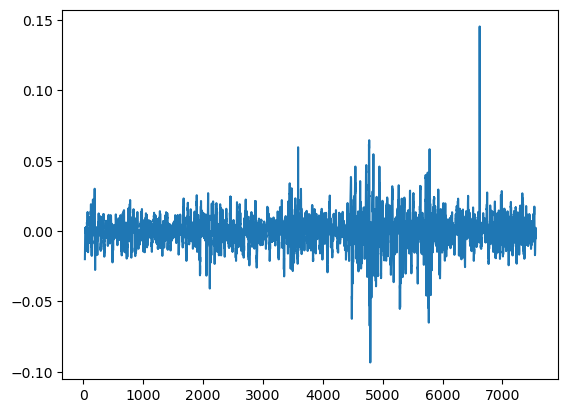

In [29]:
result.resid.plot()

<Axes: >

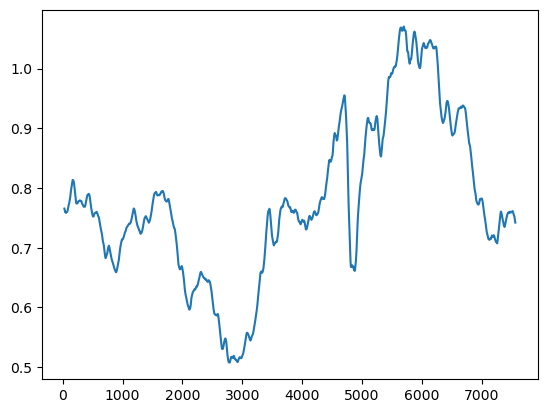

In [30]:
result.trend.plot()

<Axes: >

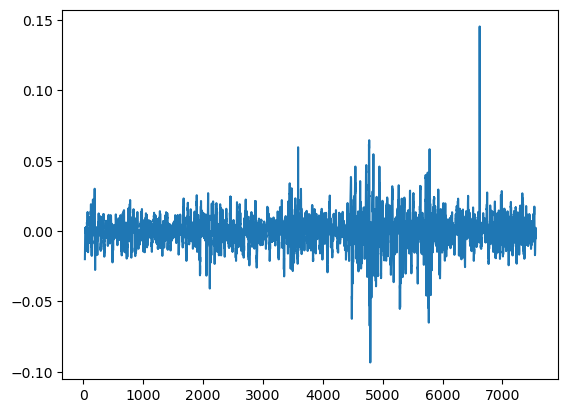

In [31]:
result.resid.plot()

In [32]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [35]:
# from the visualisation of the data it is clear that the data is non stationary
# we have adf test to confirm the non stationarity

In [40]:
from statsmodels.tsa.stattools import adfuller,acf,pacf

In [42]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   -1.664994
p-value                           0.449233
#Lags Used                        1.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


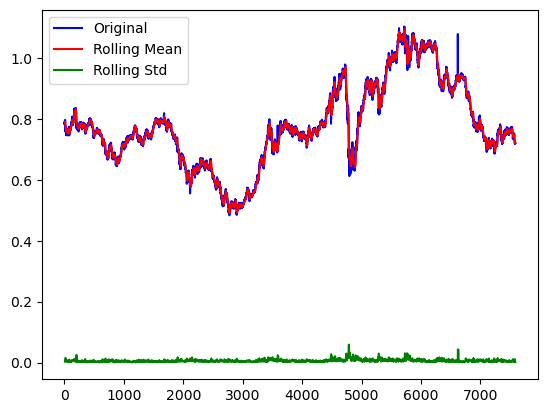

In [44]:
test_stationarity(df['Ex_rate'])

In [45]:
# since p value< 0.05 data is non stationary.

In [48]:
# ARIMA model 

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [52]:
# plot ACF and PACF 

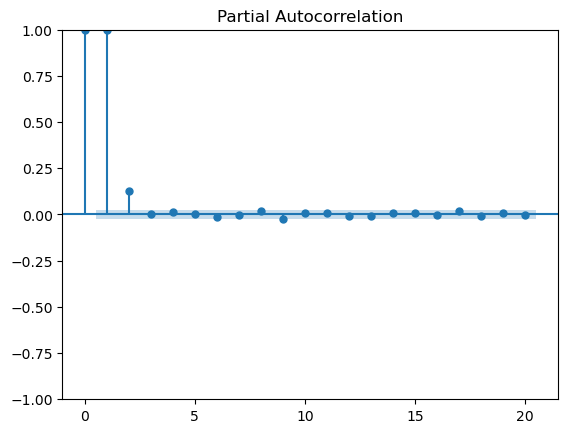

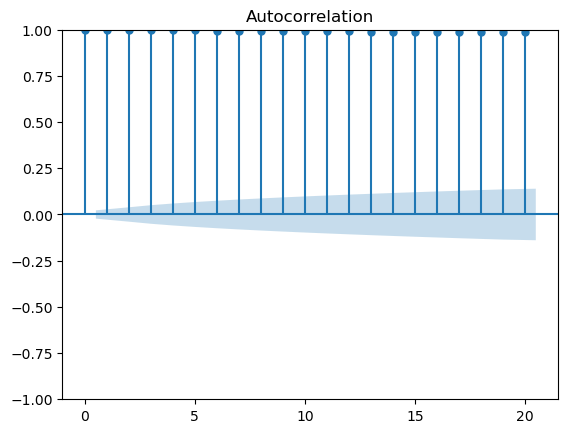

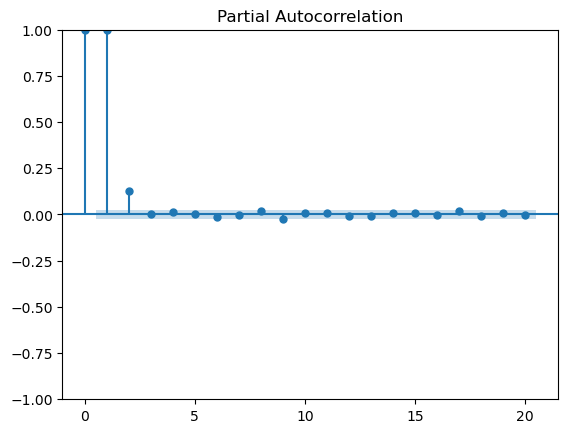

In [54]:
plot_acf(df['Ex_rate'], lags=20)
plot_pacf(df['Ex_rate'], lags=20)

In [56]:
df['Ex_rate_diff']= df['Ex_rate']-df['Ex_rate'].shift(1)

In [58]:
df['Ex_rate_diff']

0            NaN
1      -0.003700
2       0.004900
3      -0.000700
4      -0.001100
          ...   
7583   -0.000207
7584    0.003345
7585    0.001358
7586   -0.002372
7587    0.000000
Name: Ex_rate_diff, Length: 7588, dtype: float64

In [60]:
df.dropna(inplace=True)

In [62]:
df

,date,Ex_rate,Ex_rate_diff
1,02-01-1990 00:00,0.781800,-0.003700
2,03-01-1990 00:00,0.786700,0.004900
3,04-01-1990 00:00,0.786000,-0.000700
4,05-01-1990 00:00,0.784900,-0.001100
5,06-01-1990 00:00,0.786600,0.001700
...,...,...,...
7583,06-10-2010 00:00,0.718494,-0.000207
7584,07-10-2010 00:00,0.721839,0.003345
7585,08-10-2010 00:00,0.723197,0.001358
7586,09-10-2010 00:00,0.720825,-0.002372


Results of Dickey-Fuller Test :

Test Statistic                  -99.393431
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


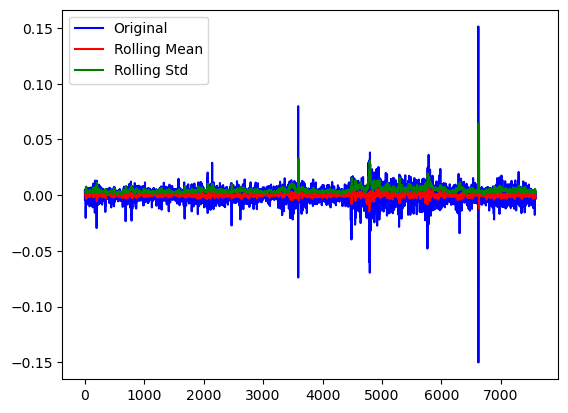

In [64]:
test_stationarity(df['Ex_rate_diff'])

In [66]:
# acf and pacf after differencing

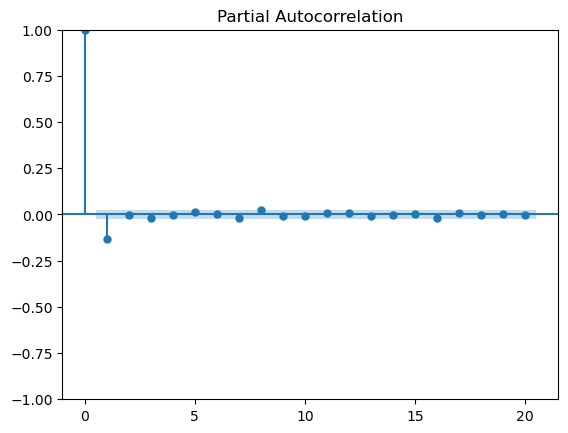

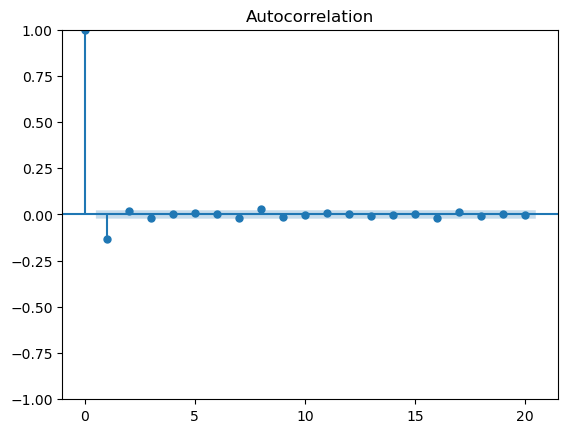

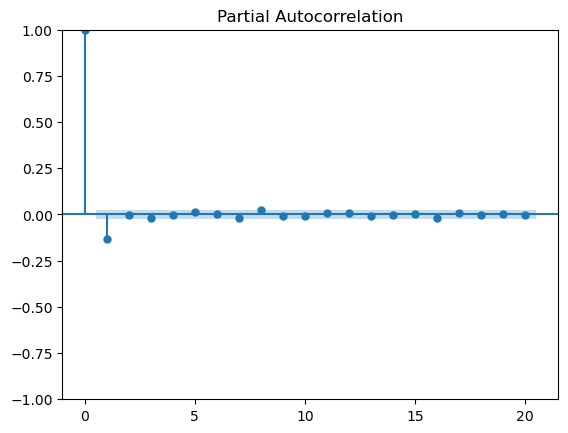

In [70]:
plot_acf(df['Ex_rate_diff'], lags=20)
plot_pacf(df['Ex_rate_diff'], lags=20)

In [72]:
# p,d,q=1,1,1

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
# Fit ARIMA model
arima_model=ARIMA(df['Ex_rate'],order=(1,1,1))
arima_result=arima_model.fit()

In [84]:
arima_result.predict()

1       0.000000
2       0.781800
3       0.786056
4       0.786089
5       0.785045
          ...   
7583    0.718837
7584    0.718522
7585    0.721400
7586    0.723017
7587    0.721136
Name: predicted_mean, Length: 7587, dtype: float64

In [103]:
arima_result.forecast(20)

7587    0.720826
7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
Name: predicted_mean, dtype: float64

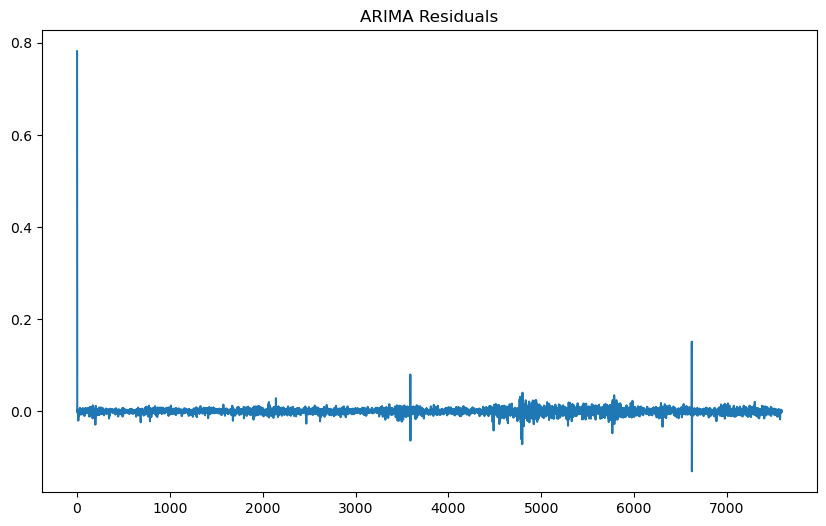

In [105]:
# Check residuals(noise)
residuals=arima_result.resid
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('ARIMA Residuals')
plt.show()

<Axes: >

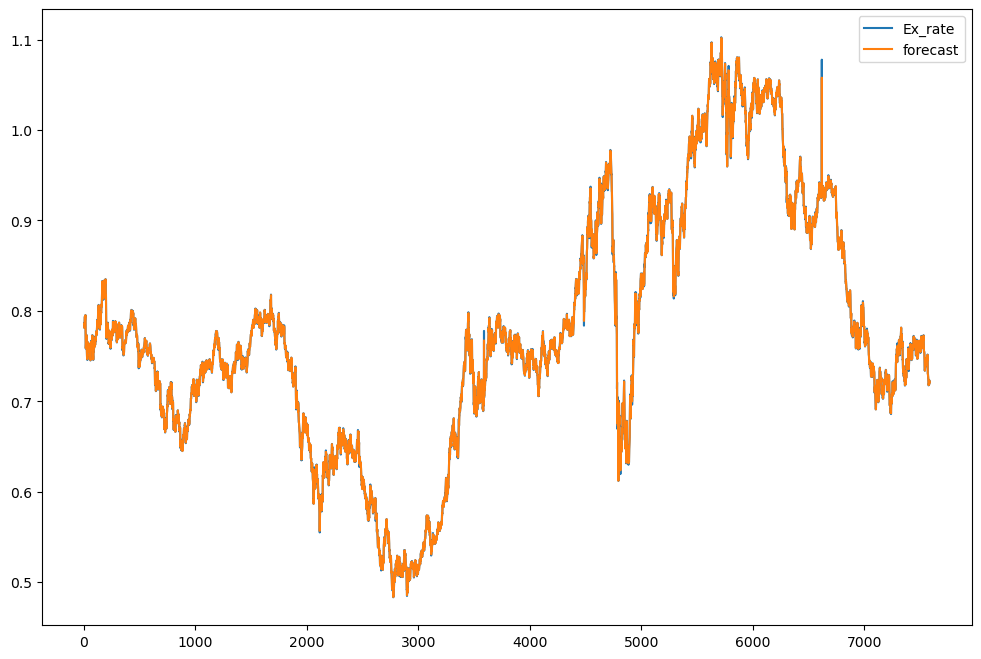

In [141]:
forecast=arima_result.forecast(steps=forecast_steps)
df[['Ex_rate','forecast']].plot(figsize=(12,8))

In [109]:
# Exponential Smoothing

In [111]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [113]:
span=60
alpha=2/(60+1)

In [115]:
# Simple Exponential Smoothing

In [117]:
df['SES']=SimpleExpSmoothing(df['Ex_rate']).fit(smoothing_level=alpha).fittedvalues

In [119]:
df

,date,Ex_rate,Ex_rate_diff,forecast,SES
1,02-01-1990 00:00,0.781800,-0.003700,0.781800,0.781800
2,03-01-1990 00:00,0.786700,0.004900,0.786056,0.781800
3,04-01-1990 00:00,0.786000,-0.000700,0.786089,0.781961
4,05-01-1990 00:00,0.784900,-0.001100,0.785045,0.782093
5,06-01-1990 00:00,0.786600,0.001700,0.786377,0.782185
...,...,...,...,...,...
7583,06-10-2010 00:00,0.718494,-0.000207,0.718522,0.741188
7584,07-10-2010 00:00,0.721839,0.003345,0.721400,0.740444
7585,08-10-2010 00:00,0.723197,0.001358,0.723017,0.739834
7586,09-10-2010 00:00,0.720825,-0.002372,0.721136,0.739289


In [121]:
df.columns

Index(['date', 'Ex_rate', 'Ex_rate_diff', 'forecast', 'SES'], dtype='object')

<Axes: >

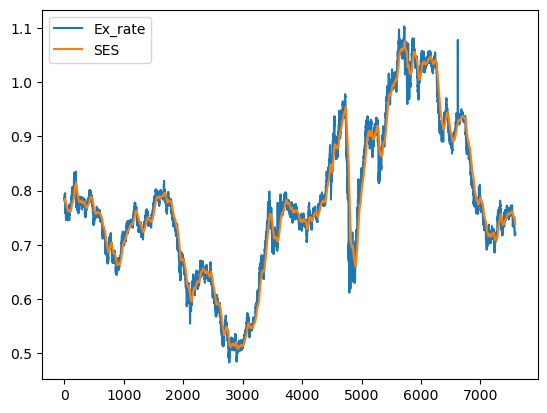

In [123]:
df[['Ex_rate','SES']].plot()

In [125]:
# Double Exponential Smoothing

In [127]:
df['DES']=ExponentialSmoothing(df['Ex_rate'],trend='additive').fit(smoothing_level=0.5,smoothing_trend=0.5).fittedvalues

In [129]:
df

,date,Ex_rate,Ex_rate_diff,forecast,SES,DES
1,02-01-1990 00:00,0.781800,-0.003700,0.781800,0.781800,0.782901
2,03-01-1990 00:00,0.786700,0.004900,0.786056,0.781800,0.783185
3,04-01-1990 00:00,0.786000,-0.000700,0.786089,0.781961,0.786656
4,05-01-1990 00:00,0.784900,-0.001100,0.785045,0.782093,0.787877
5,06-01-1990 00:00,0.786600,0.001700,0.786377,0.782185,0.787194
...,...,...,...,...,...,...
7583,06-10-2010 00:00,0.718494,-0.000207,0.718522,0.741188,0.718491
7584,07-10-2010 00:00,0.721839,0.003345,0.721400,0.740444,0.718489
7585,08-10-2010 00:00,0.723197,0.001358,0.723017,0.739834,0.720998
7586,09-10-2010 00:00,0.720825,-0.002372,0.721136,0.739289,0.723481


<Axes: >

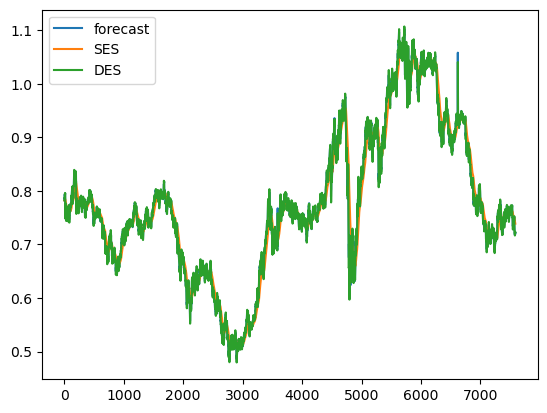

In [133]:
df[['forecast','SES','DES']].plot()

In [167]:
df['TES']=ExponentialSmoothing(df['Ex_rate'],trend='additive',seasonal='additive',seasonal_periods=60).fit()

In [168]:
df

,date,Ex_rate,Ex_rate_diff,forecast,SES,DES,TES
1,02-01-1990 00:00,0.781800,-0.003700,0.781800,0.781800,0.782901,<statsmodels.tsa.holtwinters.results.HoltWinte...
2,03-01-1990 00:00,0.786700,0.004900,0.786056,0.781800,0.783185,<statsmodels.tsa.holtwinters.results.HoltWinte...
3,04-01-1990 00:00,0.786000,-0.000700,0.786089,0.781961,0.786656,<statsmodels.tsa.holtwinters.results.HoltWinte...
4,05-01-1990 00:00,0.784900,-0.001100,0.785045,0.782093,0.787877,<statsmodels.tsa.holtwinters.results.HoltWinte...
5,06-01-1990 00:00,0.786600,0.001700,0.786377,0.782185,0.787194,<statsmodels.tsa.holtwinters.results.HoltWinte...
...,...,...,...,...,...,...,...
7583,06-10-2010 00:00,0.718494,-0.000207,0.718522,0.741188,0.718491,<statsmodels.tsa.holtwinters.results.HoltWinte...
7584,07-10-2010 00:00,0.721839,0.003345,0.721400,0.740444,0.718489,<statsmodels.tsa.holtwinters.results.HoltWinte...
7585,08-10-2010 00:00,0.723197,0.001358,0.723017,0.739834,0.720998,<statsmodels.tsa.holtwinters.results.HoltWinte...
7586,09-10-2010 00:00,0.720825,-0.002372,0.721136,0.739289,0.723481,<statsmodels.tsa.holtwinters.results.HoltWinte...


<Axes: >

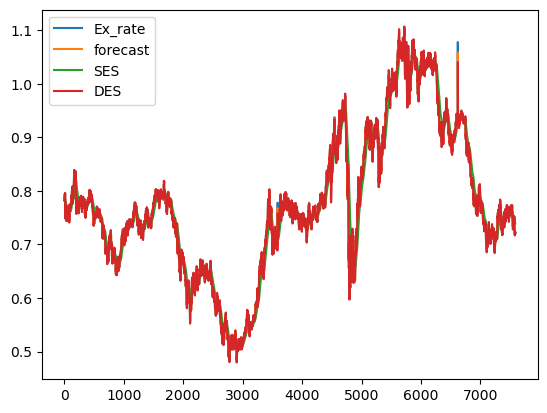

In [171]:
df[['Ex_rate', 'forecast','SES','DES','TES']].plot()

In [185]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the model
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))  
fit = model.fit()

# Access the fitted values
fitted_values = fit.fittedvalues
print(fitted_values)

1       0.000000
2       0.781800
3       0.786056
4       0.786089
5       0.785045
          ...   
7583    0.718837
7584    0.718522
7585    0.721400
7586    0.723017
7587    0.721136
Length: 7587, dtype: float64


In [187]:
test_predictions=fit.forecast(60)

In [189]:
test_predictions[:10]

7587    0.720826
7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
Name: predicted_mean, dtype: float64

In [191]:
train=df[100:]

In [193]:
train

,date,Ex_rate,Ex_rate_diff,forecast,SES,DES,TES
101,12-04-1990 00:00,0.766800,0.004500,0.766210,0.761631,0.763689,<statsmodels.tsa.holtwinters.results.HoltWinte...
102,13-04-1990 00:00,0.766000,-0.000800,0.766103,0.761801,0.766058,<statsmodels.tsa.holtwinters.results.HoltWinte...
103,14-04-1990 00:00,0.772000,0.006000,0.771212,0.761938,0.766828,<statsmodels.tsa.holtwinters.results.HoltWinte...
104,15-04-1990 00:00,0.767800,-0.004200,0.768348,0.762268,0.771506,<statsmodels.tsa.holtwinters.results.HoltWinte...
105,16-04-1990 00:00,0.769300,0.001500,0.769105,0.762450,0.770818,<statsmodels.tsa.holtwinters.results.HoltWinte...
...,...,...,...,...,...,...,...
7583,06-10-2010 00:00,0.718494,-0.000207,0.718522,0.741188,0.718491,<statsmodels.tsa.holtwinters.results.HoltWinte...
7584,07-10-2010 00:00,0.721839,0.003345,0.721400,0.740444,0.718489,<statsmodels.tsa.holtwinters.results.HoltWinte...
7585,08-10-2010 00:00,0.723197,0.001358,0.723017,0.739834,0.720998,<statsmodels.tsa.holtwinters.results.HoltWinte...
7586,09-10-2010 00:00,0.720825,-0.002372,0.721136,0.739289,0.723481,<statsmodels.tsa.holtwinters.results.HoltWinte...


In [195]:
forecast

7587    0.720826
7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
7613    0.720826
7614    0.720826
7615    0.720826
7616    0.720826
Name: predicted_mean, dtype: float64

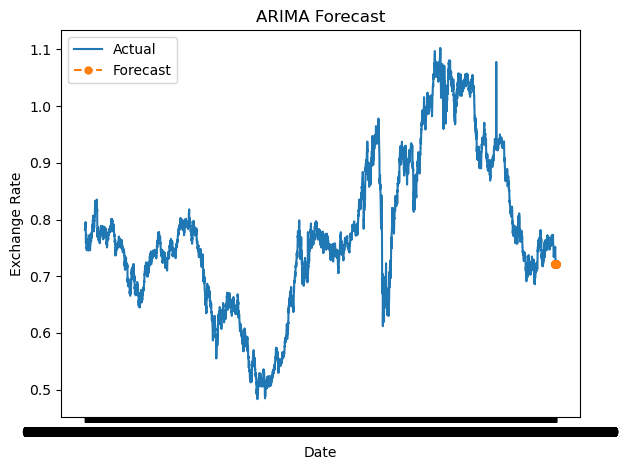

In [203]:
# Plot forecasted values
plt.plot(df['date'], df['Ex_rate'], label='Actual')
plt.plot(df['date'][-30:], forecast, label='Forecast',linestyle='--',marker='o',markersize=5)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('ARIMA Forecast')
plt.legend()
plt.tight_layout()
plt.show()

In [263]:
# Evaluation and Comparison
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [215]:
# split the data into training and testing

In [217]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(7587, 7)
(7557, 7) (30, 7)


In [219]:
model = ARIMA(train['Ex_rate'],order=(1,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7557
Model:                 ARIMA(1, 1, 1)   Log Likelihood               27930.404
Date:                Thu, 14 Nov 2024   AIC                         -55854.808
Time:                        17:01:49   BIC                         -55834.018
Sample:                             0   HQIC                        -55847.672
                               - 7557                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1263      0.045     -2.787      0.005      -0.215      -0.037
ma.L1         -0.0054      0.045     -0.120      0.905      -0.095       0.084
sigma2      3.604e-05   9.99e-08    360.724      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2845547.34
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [231]:
mse1= mean_squared_error(forecast,test['Ex_rate'])
mse1

0.0002884135211272397

In [233]:
mae1= mean_absolute_error(forecast,test['Ex_rate'])
mae1

0.012724027082976042

In [235]:
mape1 = mean_absolute_percentage_error(forecast,test['Ex_rate'])
mape1

0.017652003503820304

In [245]:
# Calculate Error Metrics for Exponential Smoothing
forecast2 = forecast[:forecast_steps] 
mae_es = mean_absolute_error(actual_values, forecast)
mse_es = mean_squared_error(actual_values, forecast))
mape_es = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100

In [249]:
forecast2

7587    0.720826
7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
7613    0.720826
7614    0.720826
7615    0.720826
7616    0.720826
Name: predicted_mean, dtype: float64

In [251]:
mae_es

0.012724027082976042

In [257]:
mse_es 

0.0002884135211272397

In [259]:
mape_es 

0.00019041356416717035

In [261]:
# Exponential Smoothing performed better based on MAPE.